# Mathematical Optimization
A tutorial from the [Tool of the Week](https://www.youtube.com/playlist?list=PLMgDVIa0Pg8Uhyyv2UcxAeee9dmCAW-yl) YouTube series.

In [1]:
# imports
import sympy as sp
%matplotlib inline
sp.init_printing()
from sympy.plotting import plot3d
import matplotlib.pyplot as plt

# simplest case - scaler valued univariate function
- have a symbolic relationship between just two things
- plan
    - take derivitive
    - find when derivitive is equal to 0 (will tell us "flat points")
    - take second derivitive
        - eval second derivitive at flat point (this will tell you whether the flat point is a min or a max or none)
            - if the evalutaion is positive -> concave up -> min
            - if negative -> concave down -> max
        - alternatively: evaluate first derivative at the left and right of flat point
            - if left is positive and right is negative -> min
            - if left is negative and right is positive -> max

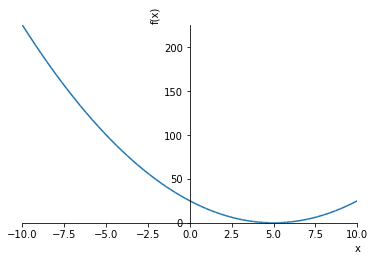

In [2]:
x = sp.symbols('x')
expr = (x - 5)**2
plot = sp.plot(expr)

In [3]:
# take derivitive
der = expr.diff(x)
der

In [4]:
# set derivitive equal to 0, to find flat points
sp.solveset(der)

In [5]:
# take second derivitive, evaluate it at flat point, to see if flat pt is min or max
der2 = der.diff(x)
der2

We know at x = 5, we have a flat point. From 2nd der, we know that it is concave up therefore a min. We say that an x of 5 minimizes this function.

# scaler valued multivariate function

- have a relationship between an output and several inputs
- what values of inputs will give us the "best" output?
- plan
    - find der w respect to each var
        - sometimes this depends values of other variables
    - we end up with a bunch of derivitive equations, one w respect to each variable
    - we find values of variables that makes all these derivitives equal to 0 (i.e. we find a flat point)
    - we do a little thinking to determine if the flat point is a min, max, or something else.
        - hint: use concavity test (second derivative test) and if that doesn't give you enough info, try looking at nearby points ;)

In [6]:
# the relationship
x,y,z = sp.symbols('x y z')
expr = x**2 + y**2
expr


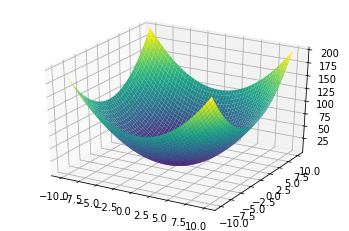

In [7]:
plot3d(expr)

In [8]:
# find gradient
derx = expr.diff(x)
dery = expr.diff(y)
display(derx,dery)

In [9]:
# solve system of equations
sp.linsolve([derx,dery],[x,y])

In [10]:
# take second der, eval at flat pt, to find out if flat pt is min or max or none
der2x = derx.diff(x)
der2y = dery.diff(y)
display(der2x,der2y)

There we go! By solving the first gradient, we found a flat point (x=0,y=0). From the second dervitive we know that the change point is a min. Therefore the values (x=0, y=0) will minimize this function!

Note: If derivitives are non linear, can use **sp.nonlinsolve**(list_of_non_lin_eqs,list_of_symbols_to_solve_for) to solve em!

# scaler value multivariate function (with non linear derivitives)!

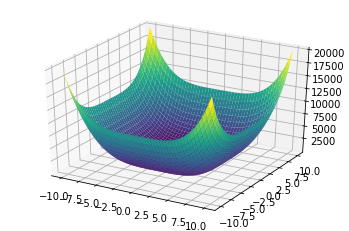

In [11]:
# the relationship
expr = x**4 + y**4
plot3d(expr)

In [12]:
# take derivitives
derx = expr.diff(x)
dery = expr.diff(y)
display(derx,dery)

In [13]:
# solve (non linear) system
sp.nonlinsolve([derx,dery],[x,y])

In [14]:
# use second derivitives to find out if change point is min or max
der2x = derx.diff(x)
der2y = dery.diff(y)
display(der2x,der2y)

So, we found a single flat point at (x=0,y=0) (by getting 1st derivatives, setting to 0, and solving system of eqs). How do we determine if this flat pt is a min or max or none?

If we take evaluate the second derivative at our flat point, we get 0, which means that at this location, it's neither concave up nor down, it is an inflection point!

To rule out an inflection point, we can test one pt to the left and one to the right of our change pt. If we are concaving down on one side and up on the other (or vice versa), then clearly we are at an inflection point. If concavity is the same on both sides, then no inflection point.

So if we rule out inflection point, it can still be a min or max. How do we proceed!? We clearly can't use the second derivative test (since it gave us 0). We could take the first der on each side! If its pos on left side, then neg on right, then we know we are at max. Get it!?



In [15]:
leftx = der2x.subs(x,-1)
rightx = der2x.subs(x,1)

lefty = der2y.subs(y,-1)
righty = der2y.subs(y,1)

display("x",leftx,rightx)
display("y",lefty,righty)

'x'

'y'

Ok, so on both left and right (on both planes), we have concave up, which means we are at a min!
Thus (0,0) is a min for this function!

# scaler valued univariate with substitutable constraint

In [16]:
# classical problem, given fixed P, maximize A
# know A = L * W
# know P = 2L + 2W
# ...so W = (P - 2L / 2)
# know A = L ((P - 2L) / 2), P is constant, L is variable, what value of L gives us biggest A?
L = sp.symbols('L')
expr = L * (10-2*L) / 2
sp.solveset(expr.diff(L))

# More complex cases

## constrained optimization (non substitutable cases)

- Have only equality constraints? Use method of lagrange multipliers to solve!
- Have some inequality constraints?
    - Are all equations (objective and constraints) linear? If so, use linear programming.
    - Is the objective function quadratic (but constraints still linear)? If so, can use quadratic programming.
- Do inputs have to be integers? Use integer programming (can be integer linear programming or integer quadratic programming depending on objective function).

## vector valued function...more complex but doable
Look up vector optimization, hard problem, but well studied. Lots of solutions exist for specific cases! Google!

# final notes

There are tons of different objective functions and tons of different types of constraints, but for most cases solutions for finding the local minima do exist. Finding a global minima is a much harder problem!